---
comments: true
layout: post
toc: true
title: Information on Database Development
description: Frontend and Backend developement process and considerations for CPT Project
type: hacks
courses: { compsci: {week: 4} }
---

![Database Ideation Flowchart.png](<attachment:Database Ideation Flowchart.png>) 
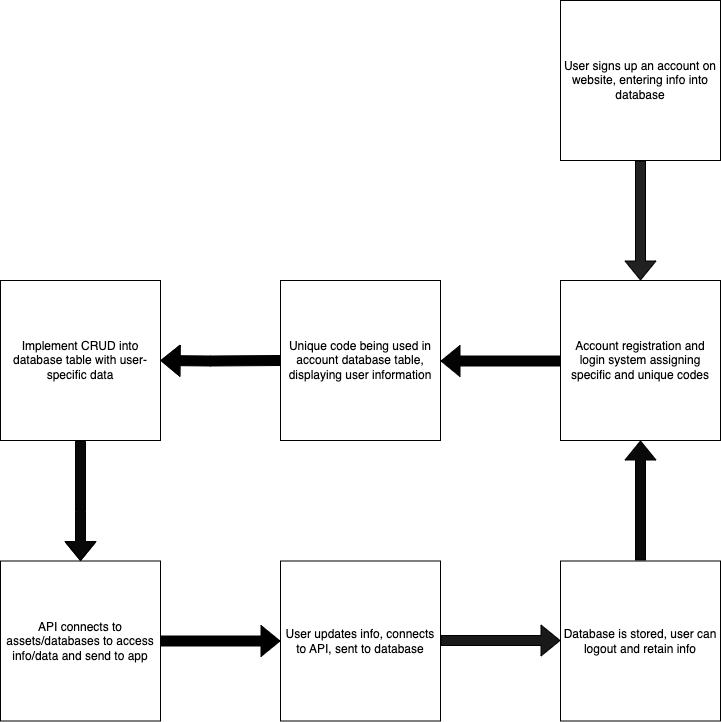

Frontend Development:

Frameworks and Libraries:
Choose a JavaScript framework or library for frontend development. Popular choices include React.js, Angular, or Vue.js.
Leverage libraries like jQuery for DOM manipulation if needed.

AJAX (Asynchronous JavaScript and XML):
Understand AJAX for making asynchronous requests to the backend.
Use Fetch API or XMLHttpRequest for handling data asynchronously.

User Interface (UI):
Design a responsive and user-friendly UI for interacting with the database.
Implement features such as forms, input validation, and user feedback.

State Management:
If using a framework like React, understand state management concepts.
Manage application state efficiently for a dynamic user experience.

Authentication and Authorization:
Implement user authentication for secure access to the frontend.
Handle user roles and permissions to control access to certain features.

Data Binding:
Use two-way data binding for seamless interaction between the UI and backend data.
Keep the UI synchronized with the database.
Backend Development:
Using JavaScript (Node.js) or Python:

Server-Side Frameworks:
For JavaScript: Use Node.js with Express.js or another framework like Nest.js.
For Python: Use Flask or Django for building the backend.

Database Integration:
Connect to the database using an appropriate driver or ORM (Object-Relational Mapping).
Execute CRUD (Create, Read, Update, Delete) operations on the database.

API Development:
Design RESTful or GraphQL APIs for communication between frontend and backend.
Implement endpoints for data retrieval, manipulation, and other functionalities.

Middleware:
Use middleware to handle tasks like authentication, logging, and request parsing.
Ensure middleware components are well-organized and modular.

Security:
Implement security measures such as input validation and protection against common vulnerabilities (e.g., SQL injection, XSS).
Set up HTTPS for secure data transmission.

Error Handling:
Develop robust error handling mechanisms to gracefully handle errors and provide meaningful feedback to the frontend.

Authentication and Authorization:
Implement user authentication and authorization on the backend.
Secure sensitive endpoints and data.

Testing:
Write unit tests and integration tests for backend functionalities.
Ensure proper error handling and edge case testing.

Scalability:
Design the backend with scalability in mind.
Optimize database queries and use caching where applicable.

Documentation:
Create comprehensive documentation for the backend API.
Include details on endpoints, request/response formats, and authentication mechanisms.

General Considerations:

Communication:
Ensure effective communication between frontend and backend teams (if separate).
Use clear API documentation for smooth integration.

Version Control:
Use version control systems like Git for tracking changes in code.
Collaborate with a team using branching and merging strategies.

Deployment:
Deploy the frontend and backend separately or together, depending on your architecture.
Use tools like Docker for containerization and continuous integration for automated deployments.

In [ ]:
/*
<table>
    <tr>
        <th><label for="name">Name</label></th>
        <th><label for="email">Email</label></th>
        <th><label for="password">Password</label></th>
        <th><label for="phone">Phone</label></th>
    </tr>
    <tr>
        <td><input type="text" name="name" id="name" required></td>
        <td><input type="email" name="email" id="email" placeholder="abc@xyz.org" required></td>
        <td><input type="password" name="password" id="password" required></td>
        <td><input type="tel" name="phone_num" id="phone_num"
            pattern="[0-9]{3}-[0-9]{3}-[0-9]{4}"
            placeholder="999-999-9999"></td>
        <td ><button onclick="create_User()">Create</button></td>
    </tr>
</table>
*/

<h3>Table</h3>
<table>
    <tr>
        <th><label for="name">Name</label></th>
        <th><label for="email">Email</label></th>
        <th><label for="password">Password</label></th>
        <th><label for="phone">Phone</label></th>
    </tr>
    <tr>
        <td><input type="text" name="name" id="name" required></td>
        <td><input type="email" name="email" id="email" placeholder="abc@xyz.org" required></td>
        <td><input type="password" name="password" id="password" required></td>
        <td><input type="tel" name="phone_num" id="phone_num"
            pattern="[0-9]{3}-[0-9]{3}-[0-9]{4}"
            placeholder="999-999-9999"></td>
        <td ><button onclick="create_User()">Create</button></td>
    </tr>
</table>

<h3>Form</h3>
<form>
    <p><label>
        Name:
        <input type="text" name="name" id="name" required>
    </label></p>
    <p><label>
        User ID:
        <input type="text" name="uid" id="uid" required>
    </label></p>
    <p><label>
        Password:
        <input type="password" name="password" id="password" required>
        Verify Password:
        <input type="password" name="passwordV" id="passwordV" required>
    </label></p>
    <p><label>
        Phone:
        <input type="tel" name="phone_num" id="phone_num"
            pattern="[0-9]{3}-[0-9]{3}-[0-9]{4}"
            placeholder="999-999-9999">
    </label></p>
    <p><label>
        Birthday:
        <input type="date" name="dob" id="dob">
    </label></p>
    <p>
        <button>Create</button>
    </p>
</form>

In [ ]:
function create_User(){
    // extract data from inputs
    const name = document.getElementById("name").value;
    const email = document.getElementById("email").value;
    const password = document.getElementById("password").value;
    const phone = document.getElementById("phone").value;
    const requestOptions = {
        method: 'POST',
        headers: {
            'Content-Type': 'application/json',
            'Authorization': 'Bearer my-token',
        },
    };
    //url for Create API
    const url='/crud_api/create/' + name + '/' + email+ '/' + password + '/' + phone;
    //Async fetch API call to the database to create a new user
    fetch(url, requestOptions).then(response => {
        // prepare HTML search result container for new output
        const resultContainer = document.getElementById("result");
        // trap error response from Web API
        if (response.status !== 200) {
            const errorMsg = 'Database response error: ' + response.status;
            console.log(errorMsg);
            // Email must be unique, no duplicates allowed
            document.getElementById("pswError").innerHTML =
                "Email already exists in the table";
            return;
        }
        // response contains valid result
        response.json().then(data => {
            console.log(data);
            //add a table row for the new/created userId
            const tr = document.createElement("tr");
            for (let key in data) {
                if (key !== 'query') {
                    //create a DOM element for the data(cells) in table rows
                    const td = document.createElement("td");
                    console.log(data[key]);
                    //truncate the displayed password to length 20
                    if (key === 'password'){
                        td.innerHTML = data[key].substring(0,17)+"...";
                    }
                    else{
                        td.innerHTML = data[key];}
                    //add the DOM data element to the row
                    tr.appendChild(td);
                }
            }
            //append the DOM row to the table
            table.appendChild(tr);
        })
    })
}

In [ ]:
/*
<table>
  <thead>
  <tr>
    <th>Name</th>
    <th>ID</th>
    <th>Actions</th>
  </tr>
  </thead>
  <tbody id="table">
    <!-- javascript generated data -->
  </tbody>
</table>
*/

// Static json, this can be used to test data prior to API and Model being ready
const json = '[{"_name": "Thomas Edison", "_uid": "toby"}, {"_name": "Nicholas Tesla", "_uid": "nick"}, {"_name": "John Mortensen", "_uid": "jm1021"}, {"_name": "Eli Whitney", "_uid": "eli"}, {"_name": "Hedy Lemarr", "_uid": "hedy"}]';

// Convert JSON string to JSON object
const data = JSON.parse(json);

// prepare HTML result container for new output
const table = document.getElementById("table");
data.forEach(user => {
    // build a row for each user
    const tr = document.createElement("tr");

    // td's to build out each column of data
    const name = document.createElement("td");
    const id = document.createElement("td");
    const action = document.createElement("td");
           
    // add content from user data          
    name.innerHTML = user._name; 
    id.innerHTML = user._uid; 

    // add action for update button
    var updateBtn = document.createElement('input');
    updateBtn.type = "button";
    updateBtn.className = "button";
    updateBtn.value = "Update";
    updateBtn.style = "margin-right:16px";
    updateBtn.onclick = function () {
      alert("Update: " + user._uid);
    };
    action.appendChild(updateBtn);

    // add action for delete button
    var deleteBtn = document.createElement('input');
    deleteBtn.type = "button";
    deleteBtn.className = "button";
    deleteBtn.value = "Delete";
    deleteBtn.style = "margin-right:16px"
    deleteBtn.onclick = function () {
      alert("Delete: " + user._uid);
    };
    action.appendChild(deleteBtn);  

    // add data to row
    tr.appendChild(name);
    tr.appendChild(id);
    tr.appendChild(action);

    // add row to table
    table.appendChild(tr);
});

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>User Registration</title>
</head>
<body>

<h3>Table</h3>
<table id="userTable">
    <tr>
        <th><label for="name">Name</label></th>
        <th><label for="email">Email</label></th>
        <th><label for="password">Password</label></th>
        <th><label for="phone">Phone</label></th>
    </tr>
</table>

<script>
function createUser() {
    // Get user inputs
    var name = document.getElementById('name').value;
    var email = document.getElementById('email').value;
    var password = document.getElementById('password').value;
    var phone = document.getElementById('phone_num').value;

    // Create a new row in the table
    var table = document.getElementById('userTable');
    var newRow = table.insertRow(-1); // -1 inserts a new row at the last position

    // Insert cells with user inputs
    var cell1 = newRow.insertCell(0);
    var cell2 = newRow.insertCell(1);
    var cell3 = newRow.insertCell(2);
    var cell4 = newRow.insertCell(3);

    cell1.innerHTML = name;
    cell2.innerHTML = email;
    cell3.innerHTML = password;
    cell4.innerHTML = phone;

    // Clear input fields after creating a user
    document.getElementById('name').value = '';
    document.getElementById('email').value = '';
    document.getElementById('password').value = '';
    document.getElementById('phone_num').value = '';
}
</script>

<!-- Your input form -->
<table>
    <tr>
        <td><input type="text" name="name" id="name" required></td>
        <td><input type="email" name="email" id="email" placeholder="abc@xyz.org" required></td>
        <td><input type="password" name="password" id="password" required></td>
        <td><input type="tel" name="phone_num" id="phone_num"
            pattern="[0-9]{3}-[0-9]{3}-[0-9]{4}"
            placeholder="999-999-9999"></td>
        <td><button onclick="createUser()">Create</button></td>
    </tr>
</table>

</body>
</html>


: 